<a href="https://colab.research.google.com/github/osamasabry9/UAE-GIS-Analysis/blob/main/UAE_GIS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Install required packages

In [ ]:
!pip install geopandas folium matplotlib seaborn --quiet


# 2: Upload the shapefile ZIP

In [ ]:
from google.colab import files
print("📁 Please upload the ZIP file: are_adm_fcsc_20230515_SHP_AB.zip")
uploaded = files.upload()

📁 Please upload the ZIP file: are_adm_fcsc_20230515_SHP_AB.zip


Saving are_adm_fcsc_20230515_shp_ab.zip to are_adm_fcsc_20230515_shp_ab.zip


# 3: Extract the ZIP file

In [ ]:
import zipfile
import os

zip_filename = 'are_adm_fcsc_20230515_shp_ab.zip'
extract_dir = 'uae_shapefile'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check extracted file names


In [ ]:
print("📂 Extracted files:")
print(os.listdir(extract_dir))

📂 Extracted files:
['are_admbnda_adm0_fcsc_20230515.prj', 'are_admbndp_admALL_fcsc_itos_20230515.prj', 'are_admbnda_adm1_fcsc_20230515.shp', 'are_admbndp_admALL_fcsc_itos_20230515.dbf', 'are_admbndl_admALL_fcsc_itos_20230515.dbf', 'are_admbnda_adm1_fcsc_20230515.shx', 'are_admbndl_admALL_fcsc_itos_20230515.sbx', 'are_admbnda_adm0_fcsc_20230515.dbf', 'are_admbndp_admALL_fcsc_itos_20230515.sbn', 'are_admbndt_adminUnitLookup.dbf', 'are_admbnda_adm0_fcsc_20230515.shx', 'are_admbnda_adm0_fcsc_20230515.shp.xml', 'are_admbndl_admALL_fcsc_itos_20230515.shx', 'are_admbndp_admALL_fcsc_itos_20230515.cpg', 'are_admbndl_admALL_fcsc_itos_20230515.shp', 'are_admbndp_admALL_fcsc_itos_20230515.sbx', 'are_admbnda_adm0_fcsc_20230515.cpg', 'are_admbndl_admALL_fcsc_itos_20230515.cpg', 'are_admbndp_admALL_fcsc_itos_20230515.shx', 'are_admbnda_adm1_fcsc_20230515.sbn', 'are_admbnda_adm1_fcsc_20230515.dbf', 'are_admbnda_adm0_fcsc_20230515.sbn', 'are_admbnda_adm1_fcsc_20230515.prj', 'are_admbnda_adm0_fcsc_20230

# 4: Load the Shapefile using GeoPandas

In [ ]:
import geopandas as gpd

# Replace with the correct filename from the extracted files
shp_path_adm1 = os.path.join(extract_dir, 'are_admbnda_adm1_fcsc_20230515.shp')
shp_path_adm0 = os.path.join(extract_dir, 'are_admbnda_adm0_fcsc_20230515.shp')

# Read shapefiles
gdf_adm1 = gpd.read_file(shp_path_adm1)  # Emirates
gdf_adm0 = gpd.read_file(shp_path_adm0)  # UAE Boundary

#
gdf_adm1.to_file("uae_adm1.geojson", driver="GeoJSON")

# Show basic info
print("✅ Admin Level 1 (Emirates):")
display(gdf_adm1[['ADM1_EN', 'ADM1_AR', 'geometry']].head())

✅ Admin Level 1 (Emirates):


ADM1_EN     ADM1_AR  \
0      Abu Dhabi      أبوظبى   
1          Dubai         دبى   
2        Sharjah     الشارقة   
3          Ajman       عجمان   
4  Umm Al Quwain  أم القيوين   

                                            geometry  
0  MULTIPOLYGON (((53.89736 24.117, 53.90013 24.1...  
1  MULTIPOLYGON (((56.09349 24.8555, 56.09377 24....  
2  MULTIPOLYGON (((55.55451 25.48569, 55.57142 25...  
3  MULTIPOLYGON (((56.06176 24.871, 56.0618 24.87...  
4  MULTIPOLYGON (((55.77579 25.64756, 55.78445 25...

---Fonts

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'

# 5: Plot static map using Matplotlib

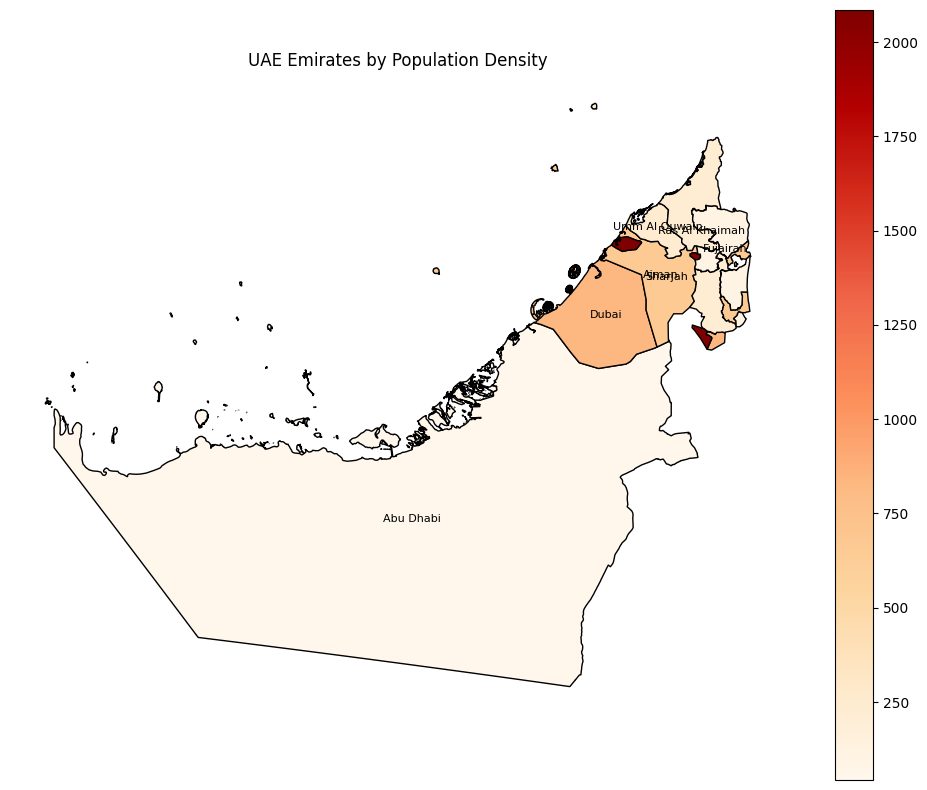

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
gdf_adm1.plot(ax=ax, column="DENSITY", cmap="OrRd", edgecolor="black", legend=True)
for idx, row in gdf_adm1.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row["ADM1_EN"], xy=(centroid.x, centroid.y), ha="center", fontsize=8)
ax.set_title("UAE Emirates by Population Density")
plt.axis("off")
plt.tight_layout()
plt.savefig("uae_density_map.png", dpi=300)
plt.show()

# 6: Display interactive map using Folium

In [ ]:
import folium
import pandas as pd
import numpy as np

uae_map = folium.Map(location=[24.45, 54.38], zoom_start=7, tiles="CartoDB positron")

# Convert any non-JSON-serializable columns to strings before passing to Folium
for col in gdf_adm1.columns:
    if gdf_adm1[col].dtype == 'datetime64[ns]' or \
       gdf_adm1[col].dtype == 'object' or \
       isinstance(gdf_adm1[col].iloc[0], (pd.Timestamp, np.datetime64)): # Check for Timestamp or datetime64 objects within object columns
        gdf_adm1[col] = gdf_adm1[col].astype(str)

for col in gdf_adm0.columns:
    if gdf_adm0[col].dtype == 'datetime64[ns]' or \
       gdf_adm0[col].dtype == 'object' or \
       isinstance(gdf_adm0[col].iloc[0], (pd.Timestamp, np.datetime64)): # Check for Timestamp or datetime64 objects within object columns
        gdf_adm0[col] = gdf_adm0[col].astype(str)


# Add Emirates Layer (ADM1)
folium.GeoJson(
    gdf_adm1,
    name="UAE Emirates (ADM1)",
    tooltip=folium.GeoJsonTooltip(fields=["ADM1_EN", "ADM1_AR"], aliases=["Emirate", "الإمارة"]),
    style_function=lambda x: {
        'fillColor': 'lightblue',
        'color': 'blue',
        'weight': 1,
        'fillOpacity': 0.4
    }
).add_to(uae_map)

# Add UAE Country Layer (ADM0)
folium.GeoJson(
    gdf_adm0,
    name="UAE Border (ADM0)",
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'black',
        'weight': 2,
        'dashArray': '5,5'
    }
).add_to(uae_map)

# Layer control
folium.LayerControl().add_to(uae_map)

# Show map
uae_map

In [64]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np

# Assuming shp_path_adm1 is defined from previous steps and is correct
gdf_adm1 = gpd.read_file(shp_path_adm1)

# Add population and area data if not available in the file
if 'POPULATION' not in gdf_adm1.columns:
    gdf_adm1['POPULATION'] = [2908173, 3411200, 1684000, 540000, 416000, 256000, 79000]

if 'AREA_KM2' not in gdf_adm1.columns:
    gdf_adm1['AREA_KM2'] = [67340, 4114, 2590, 259, 1684, 1165, 777]

# Calculate population density
gdf_adm1['DENSITY'] = gdf_adm1['POPULATION'] / gdf_adm1['AREA_KM2']

# Ensure compatibility with folium (convert non-serializable columns)
for col in gdf_adm1.columns:
    if isinstance(gdf_adm1[col].iloc[0], (pd.Timestamp, np.datetime64)):
        gdf_adm1[col] = gdf_adm1[col].astype(str)

# Create the interactive map centered on UAE
uae_map = folium.Map(location=[24.45, 54.38], zoom_start=7, tiles="CartoDB positron")

# Add Emirates layer (ADM1) with tooltip
folium.GeoJson(
    gdf_adm1,
    tooltip=folium.GeoJsonTooltip(
        fields=["ADM1_EN", "POPULATION", "AREA_KM2", "DENSITY"],
        aliases=["Emirate", "Population", "Area (km²)", "Density (people/km²)"],
        localize=True
    ),
    style_function=lambda x: {
        'fillColor': 'lightblue',
        'color': 'blue',
        'weight': 1,
        'fillOpacity': 0.5
    }
).add_to(uae_map)

# Add heatmap based on population density
heat_data = [
    [geom.centroid.y, geom.centroid.x, row.DENSITY]
    for geom, row in zip(gdf_adm1.geometry, gdf_adm1.itertuples())
]
HeatMap(heat_data, radius=25, blur=15).add_to(uae_map)

# Add famous landmarks
landmarks = {
    "Burj Khalifa": [25.1972, 55.2744],
    "Sheikh Zayed Mosque": [24.4128, 54.4745],
    "Jebel Jais": [25.9575, 56.1290]
}
for name, coords in landmarks.items():
    folium.Marker(location=coords, popup=name, icon=folium.Icon(color='purple')).add_to(uae_map)

# Save map to HTML file
uae_map.save("uae_interactive_map.html")
print("✅ Interactive map saved as 'uae_interactive_map.html'")

# Display map in notebook
uae_map

✅ Interactive map saved as 'uae_interactive_map.html'


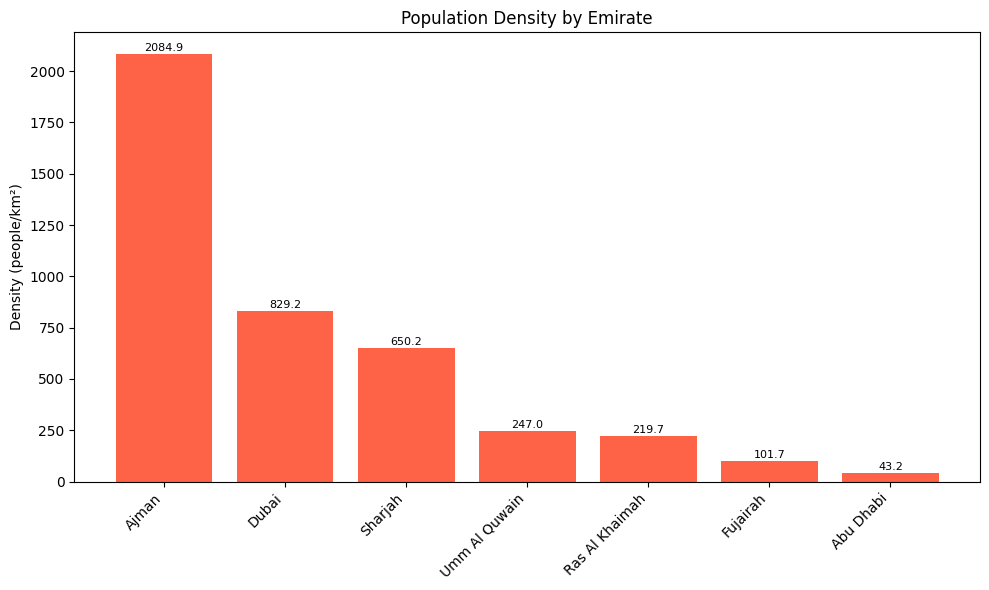

In [65]:
# Bar chart
gdf_adm1_sorted = gdf_adm1.sort_values("DENSITY", ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(gdf_adm1_sorted["ADM1_EN"], gdf_adm1_sorted["DENSITY"], color="tomato")
plt.title("Population Density by Emirate")
plt.ylabel("Density (people/km²)")
plt.xticks(rotation=45, ha="right")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{bar.get_height():.1f}",
             ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.savefig("uae_density_bar_chart.png", dpi=300)
plt.show()